<a href="https://colab.research.google.com/github/bhadreshpsavani/ExploringSentimentalAnalysis/blob/main/SentimentDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Negative Sentiment Analysis

The problem is to build and test a model that will predict the tone (neutral or negative) of the text message. To do this, you will need to train the model on the data provided. The resulting model has to predict the class (neutral or negative) and test results reported on test data that was not used to train the model. An ideal model should not miss predicting a negative tone in the message text.

## Steps:
  1. Import Data
  2. Data Analysis
  3. EDA on the data
  4. Choice of model
  5. Choice of evaluation metric
  6. Accuracy of the model
  7. Summary and analysis of the results … Where does the model fail? How would you improve predictions in future?

## Step1. Import Data

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data.csv')
df.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


## Step2. Data Analysis:

In [5]:
df.sentiment.value_counts(normalize=True)

neutral     0.591517
negative    0.408483
Name: sentiment, dtype: float64

Observation: Our data is slighly imbalanced

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11955 entries, 0 to 11954
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     11955 non-null  object
 1   text       11954 non-null  object
 2   sentiment  11954 non-null  object
dtypes: object(3)
memory usage: 280.3+ KB


According to above results, We have null value in `text` column which needs to be removed

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11953 entries, 0 to 11953
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     11953 non-null  object
 1   text       11953 non-null  object
 2   sentiment  11953 non-null  object
dtypes: object(3)
memory usage: 373.5+ KB


In [8]:
for i, text in enumerate(df.text[:20]):
  print(i+1, ":",  text)
  print()

1 : that`s enough! I`ll do nothing for 2 hours.

2 : I have to go clothes shopping tomorrow  I hate it, but I have a serious 'clothes falling apart' situation here.

3 : i am bored. :| any idea`s of a nice site?

4 : I don`t think  will want to come back  (guys read your dms)

5 : _thomas if only the drinking game was tonight...I don`t have to work till 5 tomorrow

6 : my birthday is in 2 days

7 : I wish the sun would come out...I guess it doesn`t matter since I`m at work and can`t enjoy it anyways

8 : I am very sad because I have gone on the show McFly fan I am of them!

9 : no one ever gave me the info I`m sad

10 : all tubes closed on 9th and 10th of june  any idea of how to get to the venue?

11 : ****...plans were canceled.....another friday night at home

12 :  always write holy words in capital dude, ALLAH HAFIZ !

13 :  Dang! Of course, I`m just jealous `cuz I didn`t think of it first

14 : yay!! we`ll all move!! sorry dh is being Grr...  ****

15 : I had my hair cut today an

Observation: We need to clean up our text data. It's having `:|` or `****` kind of item which will not be very effective to train an ML model

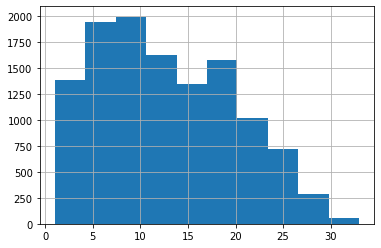

In [9]:
df["number_of_words"] = df.text.apply(lambda txt: len(txt.split()))
df["number_of_words"].hist()

In [10]:
df["number_of_words"].value_counts(normalize=True)

8     0.057726
7     0.057140
9     0.055802
10    0.053376
6     0.053041
5     0.052455
4     0.050950
12    0.047603
11    0.046516
13    0.041914
14    0.040576
15    0.037145
3     0.036476
16    0.034803
17    0.033632
20    0.033548
19    0.032628
18    0.032293
21    0.031708
22    0.027357
23    0.025851
24    0.023174
25    0.022839
2     0.019493
26    0.014641
27    0.011127
28    0.009286
1     0.008868
29    0.003597
30    0.002593
31    0.001339
32    0.000418
33    0.000084
Name: number_of_words, dtype: float64

In [11]:
df.query("number_of_words<=1")

,textID,text,sentiment,number_of_words
60,823122597e,mean,neutral,1
194,47990d2312,BRAINFREEZE,neutral,1
288,397392f0d9,WORD!!!!!,neutral,1
323,25ddc5bea5,ruilen?,neutral,1
634,4f91f17179,boo,neutral,1
...,...,...,...,...
11541,3c8698c64b,yup,neutral,1
11558,65a9dd6348,byeeeee,neutral,1
11570,50f5c4bba5,upgraded,neutral,1
11577,044c845832,yes,neutral,1


Our data is having `www.youtube.com/watch?v=9FtuV3xMrN0` kind of text, we can't ignore/ remove such data. It doesn't convery much  but when user enters such data model should be able to handle such cases and correctly classify them. 

## Data Cleaning:

In [12]:
import re
def remove_special_characters(text, remove_digits=False):
    text = re.sub('http://\S+|https://\S+|www.\S+', '', text)
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text.strip()

In [13]:
sentence = 'Bhadresh www.youtube.com/watch?v=9FtuV3xMrN0'
remove_special_characters(sentence)

'Bhadresh'

In [ ]:
# df.text = df.text.apply(remove_special_characters)
# df.head()

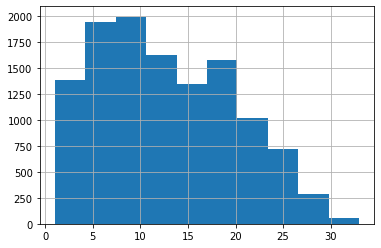

In [14]:
df["number_of_words"] = df.text.apply(lambda txt: len(txt.split()))
df["number_of_words"].hist()

In [15]:
df.query("number_of_words<=1")

,textID,text,sentiment,number_of_words
60,823122597e,mean,neutral,1
194,47990d2312,BRAINFREEZE,neutral,1
288,397392f0d9,WORD!!!!!,neutral,1
323,25ddc5bea5,ruilen?,neutral,1
634,4f91f17179,boo,neutral,1
...,...,...,...,...
11541,3c8698c64b,yup,neutral,1
11558,65a9dd6348,byeeeee,neutral,1
11570,50f5c4bba5,upgraded,neutral,1
11577,044c845832,yes,neutral,1


## Create Train and Test Data:

In [16]:
sentimental_data = df[['text', 'sentiment']]
sentimental_data.columns=['sentence', 'label']
sentimental_data.head()

,sentence,label
0,that`s enough! I`ll do nothing for 2 hours.,neutral
1,I have to go clothes shopping tomorrow I hate...,negative
2,i am bored. :| any idea`s of a nice site?,neutral
3,I don`t think will want to come back (guys r...,negative
4,_thomas if only the drinking game was tonight....,neutral


In [17]:
sentimental_data['label']=sentimental_data.label.apply(lambda x:x=='negative')*1
sentimental_data.head()

,sentence,label
0,that`s enough! I`ll do nothing for 2 hours.,0
1,I have to go clothes shopping tomorrow I hate...,1
2,i am bored. :| any idea`s of a nice site?,0
3,I don`t think will want to come back (guys r...,1
4,_thomas if only the drinking game was tonight....,0


In [18]:
# to evenly divide train and test dataset
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(sentimental_data, sentimental_data["label"]):
    strat_train_set = sentimental_data.iloc[train_index]
    test_set = sentimental_data.iloc[test_index]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
for train_index, val_index in split.split(strat_train_set, strat_train_set["label"]):
    train_set = strat_train_set.iloc[train_index]
    val_set = strat_train_set.iloc[val_index]

In [19]:
sentimental_data.label.value_counts(normalize=True)

0    0.591483
1    0.408517
Name: label, dtype: float64

In [20]:
train_set.label.value_counts(normalize=True)

0    0.591571
1    0.408429
Name: label, dtype: float64

In [21]:
val_set.label.value_counts(normalize=True)

0    0.591078
1    0.408922
Name: label, dtype: float64

In [22]:
test_set.label.value_counts(normalize=True)

0    0.591137
1    0.408863
Name: label, dtype: float64

In [23]:
print(len(train_set), len(val_set), len(test_set))

9681 1076 1196


We divided data in training and testset with equal labeling distribution

## Tokenization and Preprocessing

In [24]:
!pip install -q transformers datasets

     |████████████████████████████████| 2.1MB 6.7MB/s 
     |████████████████████████████████| 225kB 28.3MB/s 
     |████████████████████████████████| 3.3MB 29.3MB/s 
     |████████████████████████████████| 901kB 39.5MB/s 
     |████████████████████████████████| 112kB 43.5MB/s 
     |████████████████████████████████| 245kB 37.0MB/s 


In [39]:
MODEL_NAME = 'distilbert-base-uncased'
NUM_LABELS = 2
MAX_LEN = 64
BATCH_SIZE=32
EPOCHS = 5
LEARNING_RATE = 2e-5

In [40]:
from datasets import Dataset
# convert datafrane to huggingface dataset for effcient preprocessing
train_dataset = Dataset.from_pandas(train_set)
test_dataset = Dataset.from_pandas(test_set)
val_dataset = Dataset.from_pandas(val_set)

In [41]:
train_dataset[0]

{'__index_level_0__': 131,
 'label': 1,
 'sentence': ' No. As a result, the salary is a decrease'}

In [42]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

In [43]:
def tokenizer_function(examples):
  """ This function will take sentence and
      convert sentences in to tokenized/encoded form
      input: text sentence
      return: `attention_mask`, `input_ids`, `token_type_ids`
  """
  return tokenizer(examples['sentence'], truncation=True, max_length=64, padding='max_length')

In [44]:
tokenizer_function(train_dataset[0])

{'input_ids': [101, 2053, 1012, 2004, 1037, 2765, 1010, 1996, 10300, 2003, 1037, 9885, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [45]:
encoded_train_dataset = train_dataset.map(tokenizer_function, batched=True)
encoded_test_dataset = test_dataset.map(tokenizer_function, batched=True)
encoded_val_dataset = val_dataset.map(tokenizer_function, batched=True)

## Train_Model

In [46]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [47]:
from datasets import load_metric
metric = load_metric('f1')
metric

Metric(name: "f1", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions: Predicted labels, as returned by a model.
    references: Ground truth labels.
    labels: The set of labels to include when average != 'binary', and
        their order if average is None. Labels present in the data can
        be excluded, for example to calculate a multiclass average ignoring
        a majority negative class, while labels not present in the data will
        result in 0 components in a macro average. For multilabel targets,
        labels are column indices. By default, all labels in y_true and
        y_pred are used in sorted order.
    average: This parameter is required for multiclass/multilabel targets.
        If None, the scores for each class are returned. Otherwise, this
        determines the type of averaging performed on the data:
            binary: Only report results for the class specified by pos

In [48]:
args = TrainingArguments(
    "sentimental-analysis",
    evaluation_strategy = "epoch",
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=EPOCHS,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
)

In [49]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [50]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [51]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,No log,0.439690,0.729870,3.948300,272.525000
2,0.409800,0.427753,0.786192,3.937600,273.265000
3,0.409800,0.474479,0.778429,3.944400,272.790000
4,0.224800,0.569362,0.778661,3.942100,272.950000
5,0.137300,0.615702,0.777393,3.940700,273.051000


TrainOutput(global_step=1515, training_loss=0.25590352406202765, metrics={'train_runtime': 653.606, 'train_samples_per_second': 2.318, 'total_flos': 1244527587475200.0, 'epoch': 5.0, 'init_mem_cpu_alloc_delta': 0, 'init_mem_gpu_alloc_delta': 268428800, 'init_mem_cpu_peaked_delta': 0, 'init_mem_gpu_peaked_delta': 0, 'train_mem_cpu_alloc_delta': -11780096, 'train_mem_gpu_alloc_delta': 1076879360, 'train_mem_cpu_peaked_delta': 11784192, 'train_mem_gpu_peaked_delta': 526814720})

In [53]:
trainer.evaluate()

{'epoch': 5.0,
 'eval_f1': 0.7861915367483295,
 'eval_loss': 0.427752822637558,
 'eval_mem_cpu_alloc_delta': 0,
 'eval_mem_cpu_peaked_delta': 0,
 'eval_mem_gpu_alloc_delta': 0,
 'eval_mem_gpu_peaked_delta': 69261824,
 'eval_runtime': 4.0437,
 'eval_samples_per_second': 266.092}

## Predictions

In [57]:
output = trainer.predict(encoded_test_dataset)
output

PredictionOutput(predictions=array([[ 0.9661469 , -0.947449  ],
       [-1.7389725 ,  2.051532  ],
       [ 0.22046472, -0.12687579],
       ...,
       [ 0.27516907, -0.17383696],
       [ 0.00583127, -0.02317329],
       [-1.7694421 ,  2.1205177 ]], dtype=float32), label_ids=array([0, 1, 0, ..., 0, 1, 1]), metrics={'test_loss': 0.4420171082019806, 'test_f1': 0.7740667976424361, 'test_runtime': 4.4566, 'test_samples_per_second': 268.364, 'test_mem_cpu_alloc_delta': 45056, 'test_mem_gpu_alloc_delta': 0, 'test_mem_cpu_peaked_delta': 0, 'test_mem_gpu_peaked_delta': 75545600})

In [69]:
predictions = output.predictions
predictions = np.argmax(predictions, axis=1)
predictions.shape

(1196,)

In [70]:
target = np.array(encoded_test_dataset['label'])
target.shape

(1196,)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, predictions)

array([[572, 135],
       [ 95, 394]])

In [73]:
tn, fp, fn, tp = confusion_matrix(target, predictions).ravel()
tn, fp, fn, tp

(572, 135, 95, 394)

## Hyperparameter Search

In [ ]:
!pip install -q optuna
# ! pip install ray[tune]

     |████████████████████████████████| 296kB 15.8MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 1.2MB 35.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 112kB 24.6MB/s 
     |████████████████████████████████| 143kB 21.6MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
  Created wheel for alembic: filename=alembic-1.6.2-py2.py3-none-any.whl size=164219 sha256=4a7d796f8c11ca2aa5a27bea21d876019097f74fb98baa2e2c2d77986acada86
  Stored in directory: /root/.cache/pip/wheels/a5/63/44/db29401e49ef5331c163b591f12a465c40af864bfa888dabd2
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=acd5783b2231b34351b2a77e46899db3f0c984a65f1b87487b3d40ea2c775f51
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built alembic pyperclip


In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS)

In [ ]:
trainer = Trainer(
    model_init=model_init,
    args=args,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

[I 2021-05-09 09:24:58,178] A new study created in memory with name: no-name-97627ff2-a26f-4733-9e41-8b10ff6faefa
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpo

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,0.420300,0.403241,0.798577,8.712800,593.264000
2,0.349100,0.384169,0.807889,8.737300,591.602000


[I 2021-05-09 09:37:07,806] Trial 0 finished with value: 0.8078886310904873 and parameters: {'learning_rate': 5.3267876954445546e-06, 'num_train_epochs': 2, 'seed': 10, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 0.8078886310904873.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model f

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,0.395100,0.379377,0.815728,8.496600,608.363000


[I 2021-05-09 09:47:35,166] Trial 1 finished with value: 0.8157282456956724 and parameters: {'learning_rate': 1.0347633872204621e-05, 'num_train_epochs': 1, 'seed': 28, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 0.8157282456956724.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,0.381400,0.357658,0.823502,8.463600,610.730000


[I 2021-05-09 09:57:58,358] Trial 2 finished with value: 0.8235015399194504 and parameters: {'learning_rate': 9.30238147960175e-05, 'num_train_epochs': 1, 'seed': 37, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 0.8235015399194504.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,0.492300,0.537790,0.803131,8.414500,614.300000
2,0.454800,0.561331,0.808788,8.411300,614.527000
3,0.432800,0.571134,0.822984,8.375800,617.134000
4,0.417600,0.576504,0.825087,8.374000,617.268000


[I 2021-05-09 11:15:57,121] Trial 3 finished with value: 0.8250871080139373 and parameters: {'learning_rate': 2.631156401853109e-06, 'num_train_epochs': 4, 'seed': 29, 'per_device_train_batch_size': 4}. Best is trial 3 with value: 0.8250871080139373.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fro

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,No log,0.568084,0.565770,8.997400,574.499000
2,0.608400,0.486916,0.738277,9.019100,573.116000


[I 2021-05-09 11:21:50,691] Trial 4 finished with value: 0.7382767382767382 and parameters: {'learning_rate': 2.089085492933346e-06, 'num_train_epochs': 2, 'seed': 13, 'per_device_train_batch_size': 64}. Best is trial 3 with value: 0.8250871080139373.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,0.367300,0.334697,0.832246,9.765700,529.299000
2,0.223200,0.356396,0.855096,9.628500,536.845000
3,0.127900,0.443050,0.868087,9.601500,538.351000
4,0.065400,0.552524,0.870649,9.728800,531.311000


[I 2021-05-09 11:45:40,269] Trial 5 finished with value: 0.8706491063029164 and parameters: {'learning_rate': 3.0289931998117415e-05, 'num_train_epochs': 4, 'seed': 34, 'per_device_train_batch_size': 16}. Best is trial 5 with value: 0.8706491063029164.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model f

Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,No log,0.454653,0.759378,9.628000,536.873000


[I 2021-05-09 11:48:39,336] Trial 6 pruned. 
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_class

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,F1,Runtime,Samples Per Second
1,0.360400,0.370071,0.823586,9.828200,525.937000


[I 2021-05-09 12:00:02,424] Trial 7 finished with value: 0.823585581284316 and parameters: {'learning_rate': 1.7565114080077228e-05, 'num_train_epochs': 1, 'seed': 6, 'per_device_train_batch_size': 8}. Best is trial 5 with value: 0.8706491063029164.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from

Epoch,Training Loss,Validation Loss


In [ ]:
best_run

In [ ]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

## Find Accuracy of Model

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(target, predictions)

0.8076923076923077

Model is 80% Accurate. If we combine train+val data model can be upto 84% accurate. With 83 F1

## Why Model will fail?

Model fails mainly because of unclean data. Words should be corrected using NLTK. 

## Future Improvement
1. Do data Cleaning
2. Selected Large model instead of base of other bigger model
3. Experiment with Albert and Roberta because they are having bigger model architecture. Even Bert model can give better result compare to Distilbert
4. Do hyperparameter Tuning and select based Hyperparameter for selected model